# Association Rules and Lift Analysis

# Data Preparation and Analysis

### Transform the dataset to use in market basket analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('../Data-MBA/teleco_market_basket.csv')

In [4]:
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(15002, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item01  7501 non-null   object
 1   Item02  5747 non-null   object
 2   Item03  4389 non-null   object
 3   Item04  3345 non-null   object
 4   Item05  2529 non-null   object
 5   Item06  1864 non-null   object
 6   Item07  1369 non-null   object
 7   Item08  981 non-null    object
 8   Item09  654 non-null    object
 9   Item10  395 non-null    object
 10  Item11  256 non-null    object
 11  Item12  154 non-null    object
 12  Item13  87 non-null     object
 13  Item14  47 non-null     object
 14  Item15  25 non-null     object
 15  Item16  8 non-null      object
 16  Item17  4 non-null      object
 17  Item18  4 non-null      object
 18  Item19  3 non-null      object
 19  Item20  1 non-null      object
dtypes: object(20)
memory usage: 2.3+ MB


In [7]:
# Drop rows that have nothing in them
df.dropna(axis=0, how='all', inplace=True)

In [8]:
df.shape

(7501, 20)

In [9]:
# Create a list of lists from all the rows
transactions = []
for i in range (0, 7501):
    transactions.append([str(df.values[i,j]) for j in range(0,20)])

In [10]:
# Hot encode split data
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)

In [11]:
df_clean = pd.DataFrame(onehot, columns = encoder.columns_)
df_clean.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,...,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nan,nonda USB C to USB Adapter,seenda Wireless mouse
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [12]:
df_clean.shape

(7501, 120)

In [1]:
# Check to see if there are any empty(nan) columns
# for col in df_clean:
#     print(col)

In [14]:
# Drop the empty column 
df_clean = df_clean.drop(['nan'],axis=1)

In [15]:
# Check to see if the empty column is dropped
df_clean.shape

(7501, 119)

In [16]:
# Save teh cleaned data set to csv file
df_clean.to_csv('mba_cleaned_df.csv')

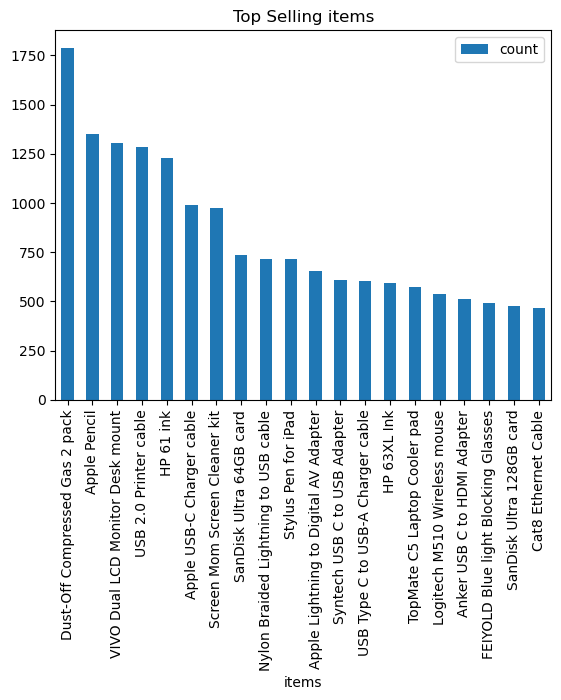

In [17]:
# Visualize top selling items
df2 = df_clean.sum().sort_values(ascending = False).head(20)
df2 = df2.to_frame()
df2 = df2.reset_index()
df2 = df2.rename(columns = {'index': 'items',0: 'count'})


ax = df2.plot.bar(x = 'items', y = 'count')
plt.title('Top Selling items');

### Execute the code used to generate association rules with the Apriori algorithm

In [2]:
# How many times items were in transactions
# df_clean.sum()

In [3]:
# Computing Support for each item
# df_clean.mean()

In [20]:
# Pruning - set minimum support (frequency of itemsets) as at least 1% out of total transactions
frequent_items = apriori(df_clean, min_support=0.01,  use_colnames=True) #max_len = default is none
len(frequent_items)

257

In [21]:
frequent_items.sample(2)

,support,itemsets
243,0.014265,"(VIVO Dual LCD Monitor Desk mount, Dust-Off Compressed Gas 2 pack, Apple Pencil)"
249,0.011065,"(Nylon Braided Lightning to USB cable, Screen Mom Screen Cleaner kit, Dust-Off Compressed Gas 2 pack)"


In [22]:
# Mean support of items 
frequent_items['support'].mean()

0.026918849211804187

### C.3. Provide values for support, lift, and confidence of the association rules table

In [23]:
# Generate rules with their corresponding support, confidence and lift
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
len(rules)

406

In [24]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
1,(Dust-Off Compressed Gas 2 pack),(10ft iPHone Charger Cable 2 Pack),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182
2,(10ft iPHone Charger Cable 2 Pack),(HP 61 ink),0.050527,0.163845,0.010132,0.200528,1.223888,0.001853,1.045884
3,(HP 61 ink),(10ft iPHone Charger Cable 2 Pack),0.163845,0.050527,0.010132,0.061839,1.223888,0.001853,1.012058
4,(10ft iPHone Charger Cable 2 Pack),(Screen Mom Screen Cleaner kit),0.050527,0.129583,0.015198,0.300792,2.321232,0.008651,1.244861


In [25]:
(df_clean['Dust-Off Compressed Gas 2 pack']).sum()

1788

In [26]:
(df_clean['10ft iPHone Charger Cable 2 Pack']).sum()

379

##### Inspect the rules table visualy with heatmap and scatterplot

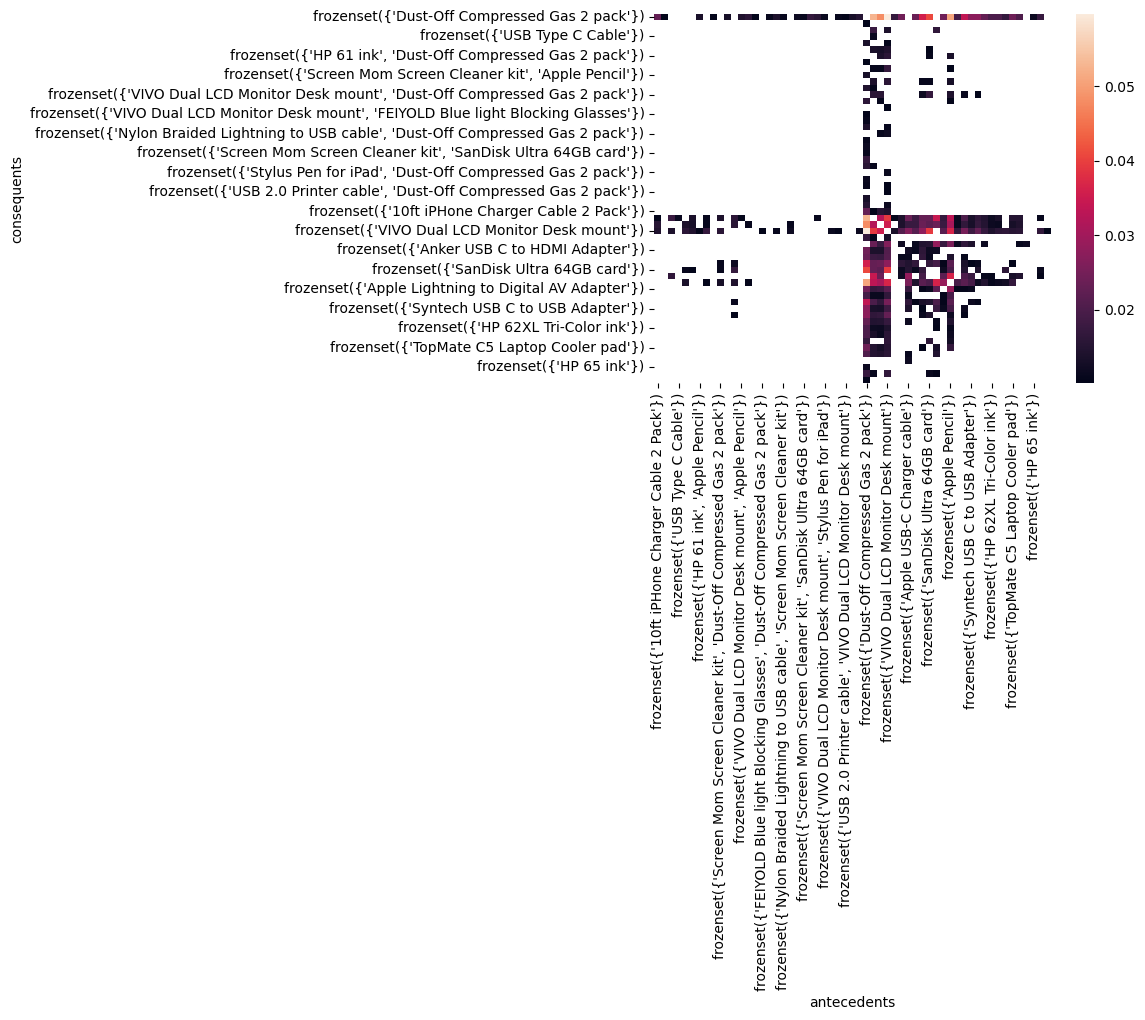

In [27]:
# Heatmap below shows no association with most items, but there are a few
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(support_table);

In [28]:
rules.mean(numeric_only=True)

antecedent support    0.118699
consequent support    0.118699
support               0.017154
confidence            0.183657
lift                  1.587598
leverage              0.005587
conviction            1.089712
dtype: float64

> Filter for 45% confidence that 2nd item was purchased, and lift over 1.5 which means the combination of itemsets occurs a little higher than expected

In [29]:
# Use set conditions for confidence, support, and lift- use mean support, increased confidence, mean lift
filters = rules[ (rules['confidence'] >0.45) &
                (rules['support'] > 0.01) &
                (rules['lift']>1.5)]
filters

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
314,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
342,"(HP 61 ink, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
360,"(Nylon Braided Lightning to USB cable, Screen Mom Screen Cleaner kit)",(Dust-Off Compressed Gas 2 pack),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136
372,"(Screen Mom Screen Cleaner kit, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552
390,"(VIVO Dual LCD Monitor Desk mount, Stylus Pen for iPad)",(Dust-Off Compressed Gas 2 pack),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557


### C.4. Identify top three rules generated by the Apriori algorithm, include summaries

I chose to determine rules based on set conditions because the top 5 rules that came up did not have high confidence levels

In [30]:
# Top 3 rules 
filters[:3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10ft iPHone Charger Cable 2 Pack),(Dust-Off Compressed Gas 2 pack),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
314,"(SanDisk Ultra 64GB card, Apple Pencil)",(Dust-Off Compressed Gas 2 pack),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
342,"(HP 61 ink, SanDisk Ultra 64GB card)",(Dust-Off Compressed Gas 2 pack),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937


##### Top 3 rules 

**Rule 1:** 10ft iPHone Charger Cable 2 Pack -> Dust-Off Compressed Gas 2 pack <br>
Support: 0.023064<br>
Confidence: 0.456464<br>
Lift: 1.914955<br>

**Rule 2:** SanDisk Ultra 64GB card, Apple Pencil -> Dust-Off Compressed Gas 2 pack <br>
Support: 0.010132<br>
Confidence: 0.506667<br>
Lift: 2.125563<br>

**Rule 3:** HP 61 ink, SanDisk Ultra 64GB card -> Dust-Off Compressed Gas 2 pack <br>
Support: 0.010932<br>
Confidence: 0.473988<br>
Lift: 1.988472<br>

In [31]:
# Frequency of X->Y -rule 1
( df_clean['10ft iPHone Charger Cable 2 Pack'] & 
 df_clean['Dust-Off Compressed Gas 2 pack']).sum()

173

In [32]:
# Frequency of X->Y -rule 2
(df_clean['SanDisk Ultra 64GB card']&
 df_clean['Apple Pencil']&
 df_clean['Dust-Off Compressed Gas 2 pack']).sum()

76

In [33]:
# Frequency of X->Y -rule 3
(df_clean['HP 61 ink']&
 df_clean['SanDisk Ultra 64GB card']&
 df_clean['Dust-Off Compressed Gas 2 pack']).sum()

82

In [34]:
print('10ft iPHone Charger Cable 2 Pack:', df_clean['10ft iPHone Charger Cable 2 Pack'].sum())
print('SanDisk Ultra 64GB card:', df_clean['SanDisk Ultra 64GB card'].sum())
print('Apple Pencil:', df_clean['Apple Pencil'].sum())
print('HP 61 ink:', df_clean['HP 61 ink'].sum())
print('Dust-Off Compressed Gas 2 pack:', df_clean['Dust-Off Compressed Gas 2 pack'].sum())

10ft iPHone Charger Cable 2 Pack: 379
SanDisk Ultra 64GB card: 737
Apple Pencil: 1348
HP 61 ink: 1229
Dust-Off Compressed Gas 2 pack: 1788


# Data Summary and Implications






### Recommend a course of action 

There are several transactions that have items that customers buy together. Dust-off Compressed Gas  2 pack is a popular item. It could be offered with a discount to drive in more sales. iPhone Charger Cable is not purchased as much even though it was combined with Dust-Off. Incentives to buy this item can be implemented to boost the sales. 